<a href="https://colab.research.google.com/github/toby-p/temp/blob/main/ERA5_Land_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ERA5-Land Dataset Introduction
The ERA5-Land dataset is available for public use for the period from 1950 to 2-3 months before the present. ERA5-Land provides hourly high resolution information of surface variables. The data is a replay of the land component of the ERA5 climate reanalysis with a finer spatial resolution: ~9km grid spacing. ERA5-Land includes information about uncertainties for all variables at reduced spatial and temporal resolutions.

ERA5-Land provides much finer-scale information than the land surface component of ERA5, which has a 31 km grid spacing. The figure shows the soil temperature on 15 March 2010 according to three ECMWF reanalyses: ERA-Interim, ERA5 and ERA5-Land. The enhanced resolution in ERA5-Land makes it possible to reveal much greater detail in the soil temperature structure and to resolve lower temperatures in the peaks of the Alpine region.



### Use the CDS API in Google Colab
https://stackoverflow.com/questions/64304862/using-cdsapi-in-google-colab

In [ ]:
url = 'url: https://cds.climate.copernicus.eu/api/v2'
key = 'key: 153721:94aee50e-8cd8-4833-ac6c-b82855cc0563'

with open('/root/.cdsapirc', 'w') as f:
    f.write('\n'.join([url, key]))

with open('/root/.cdsapirc') as f:
    print(f.read())

url: https://cds.climate.copernicus.eu/api/v2
key: 153721:94aee50e-8cd8-4833-ac6c-b82855cc0563


In [ ]:
!pip install cdsapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Xarray** is a python package for working with labeled multi-dimensional (a.k.a. N-dimensional, ND) arrays, it includes functions for advanced analytics and visualization.

In [ ]:
!pip install xarray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Download ERA5-Land Dataset
## Selected Variables
## 1. 2m temperature (K)
> Temperature of air at 2m above the surface of land, sea or in-land waters. 2m temperature is calculated by interpolating between the lowest model level and the Earth's surface, taking account of the atmospheric conditions. Temperature measured in kelvin can be converted to degrees Celsius (°C) by subtracting 273.15.

## 2. Total precipitation	(m)
> Accumulated liquid and frozen water, including rain and snow, that falls to the Earth's surface. It is the sum of large-scale precipitation (that precipitation which is generated by large-scale weather patterns, such as troughs and cold fronts) and convective precipitation (generated by convection which occurs when air at lower levels in the atmosphere is warmer and less dense than the air above, so it rises). Precipitation variables do not include fog, dew or the precipitation that evaporates in the atmosphere before it lands at the surface of the Earth. This variable is accumulated from the beginning of the forecast time to the end of the forecast step. The units of precipitation are depth in metres. It is the depth the water would have if it were spread evenly over the grid box. Care should be taken when comparing model variables with observations, because observations are often local to a particular point in space and time, rather than representing averages over a model grid box and model time step.





### GRIB1, GRIB2, NetCDF: What do I use?


**NetCDF (network Common Data Form)** is a file format for storing multidimensional scientific data (variables) such as temperature, humidity, pressure, wind speed, and direction. Each of these variables can be displayed through a dimension (such as time) in ArcGIS by making a layer or table view from the netCDF file.


**GRIB** is a World Meteorological Organization (WMO) international standard for exchanging GRidded BInary or General Regularly-distributed Information in Binary form data.

GRIB1 is the older format.

GRIB2 improves upon the standard with the same compression software commonly used for images to gain a roughly 50% reduction in file size over GRIB1.  Recently, version 2 of GRIB2 was released.  It uses a slightly less aggressive form of compression, which leads to about 10% larger files than the first version of GRIB2, but decompresses about 10x faster.

NetCDF is another binary format in common use in the weather and climate community.

All three claim to be self-describing in the sense that the files tell you whats in that particular file.  GRIB1 descriptors are short and can be very cryptic.  GRIB2 is slightly better, with longer self-descriptions.  However, GRIB files in general depend on external tables referred to as GRIB Tables to explain the details of the file contents.

**NetCDF file metadata tends to be more complete and descriptive.**

https://ncarrda.blogspot.com/2015/05/grib1-grib2-netcdf-what-do-i-use.html

In [ ]:
# Attempt to download full dataset (too big!)
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-land',
    {
        'variable': [
            '2m_temperature', 'total_precipitation',
        ],
        'year': [
            '1985', '1986', '1987',
            '1988', '1989', '1990',
            '1991', '1992', '1993',
            '1994', '1995', '1996',
            '1997', '1998', '1999',
            '2000', '2001', '2002',
            '2003', '2004', '2005',
            '2006', '2007', '2008',
            '2009', '2010', '2011',
            '2012', '2013', '2014',
            '2015', '2016', '2017',
            '2018', '2019', '2020',
            '2021', '2022',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': '12:00',
        'format': 'grib',
    },
    '/content/era5-land/daily_temp_precipitation.grib')

KeyboardInterrupt: ignored

In [ ]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-land',
    {
        'variable': [
            '2m_temperature', 'total_precipitation',
        ],
        'year': '1997',
        'month': '05',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07',
        ],
        'time': '12:00',
        'format': 'netcdf',
    },
    '/content/era5-land/sample_1997_may.nc')

Result(content_length=181563744,content_type=application/x-netcdf,location=https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data1/adaptor.mars.internal-1663543797.2664511-14680-16-9f4b9564-0127-4973-a43a-db726125974f.nc)

In [ ]:
!ls

era5-land  sample_data


In [ ]:
import pandas as pd
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

from IPython import display
from IPython.display import HTML

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf

In [ ]:
xdata = xr.open_dataset('/content/era5-land/sample_1997_may.nc')

In [ ]:
df = xdata.to_dataframe()

In [ ]:
df.head

<bound method NDFrame.head of                                                 t2m        tp
longitude  latitude time                                     
0.000000    90.0    1997-05-01 12:00:00         NaN       NaN
                    1997-05-02 12:00:00         NaN       NaN
                    1997-05-03 12:00:00         NaN       NaN
                    1997-05-04 12:00:00         NaN       NaN
                    1997-05-05 12:00:00         NaN       NaN
...                                             ...       ...
359.899994 -90.0    1997-05-03 12:00:00  223.500076  0.000177
                    1997-05-04 12:00:00  224.635406  0.000202
                    1997-05-05 12:00:00  227.640396  0.000350
                    1997-05-06 12:00:00  227.367706  0.000181
                    1997-05-07 12:00:00  225.398239  0.000115

[45385200 rows x 2 columns]>

In [ ]:
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

df.head(10)

t2m  tp
longitude latitude  time                        
0.0       90.000000 1997-05-01 12:00:00  NaN NaN
                    1997-05-02 12:00:00  NaN NaN
                    1997-05-03 12:00:00  NaN NaN
                    1997-05-04 12:00:00  NaN NaN
                    1997-05-05 12:00:00  NaN NaN
                    1997-05-06 12:00:00  NaN NaN
                    1997-05-07 12:00:00  NaN NaN
          89.900002 1997-05-01 12:00:00  NaN NaN
                    1997-05-02 12:00:00  NaN NaN
                    1997-05-03 12:00:00  NaN NaN

In [ ]:
df1 = df
df1.reset_index(inplace=True)
df1.head()

,longitude,latitude,time,t2m,tp
0,0.0,90.0,1997-05-01 12:00:00,NaN,NaN
1,0.0,90.0,1997-05-02 12:00:00,NaN,NaN
2,0.0,90.0,1997-05-03 12:00:00,NaN,NaN
3,0.0,90.0,1997-05-04 12:00:00,NaN,NaN
4,0.0,90.0,1997-05-05 12:00:00,NaN,NaN


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45385200 entries, 0 to 45385199
Data columns (total 5 columns):
 #   Column     Dtype         
---  ------     -----         
 0   longitude  float64       
 1   latitude   float64       
 2   time       datetime64[ns]
 3   t2m        float32       
 4   tp         float32       
dtypes: datetime64[ns](1), float32(2), float64(2)
memory usage: 1.4 GB


In [ ]:
df1.shape

(45385200, 5)

### N/A Values Check
We may need to consider filling up the NaN values within the dataset. How?

I suspect the NaN values are coordinates of the ocean parts in the world map. So I did not fill the NaN values for now because the sea/ocean sections should not have values. In the plot it should be white.

In [ ]:
df1.isna().sum()

longitude           0
latitude            0
time                0
t2m          29895159
tp           29895159
dtype: int64

In [ ]:
xdata

<xarray.Dataset>
Dimensions:    (longitude: 3600, latitude: 1801, time: 7)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 1997-05-01T12:00:00 ... 1997-05-07T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 nan nan nan ... 225.4 225.4
    tp         (time, latitude, longitude) float32 nan nan ... 0.0001154
Attributes:
    Conventions:  CF-1.6
    history:      2022-09-18 23:30:00 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

# Visualize Geospatial Data



*   `t2m`: 2m temperature (K)
*   `tp`: Total precipitation (m)

## 1. `t2m` 2m temperature (K)

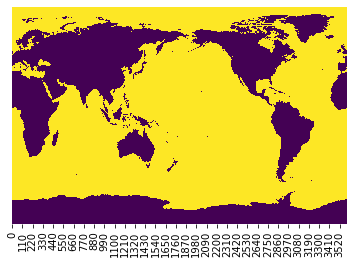

In [ ]:
import seaborn as sns
sns.heatmap(xdata['t2m'].isel(time=0).isnull(),yticklabels=False,cbar=False,cmap='viridis')

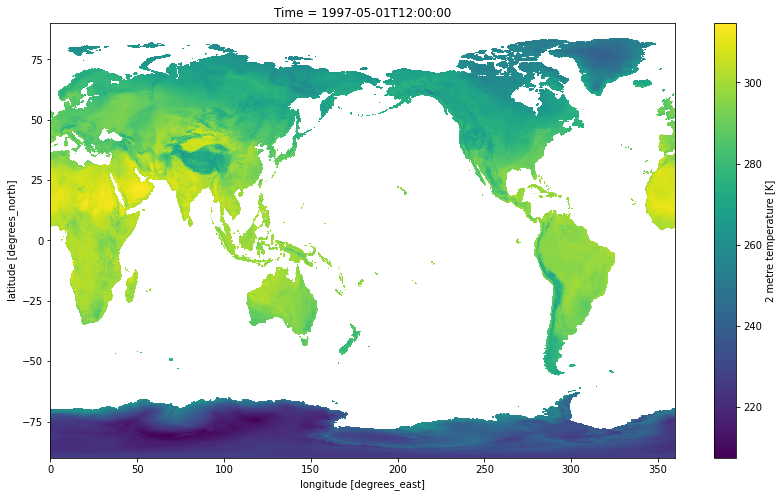

In [ ]:
# On daily basis, visualize the change of `t2m` for a week (7 days)
fig, ax = plt.subplots(figsize=(14,8))

# Plot the initial frame
cax = xdata['t2m'][0,:,:].plot(
    add_colorbar=True,
    cbar_kwargs={
        'extend':'neither'
    }
)

# Animation that creates a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    # cax.set_array(tas[frame,:,:].values.flatten())
    cax.set_array(xdata['t2m'][frame,:,:].values.flatten())
    ax.set_title("Time = " + str(xdata['t2m'].coords['time'].values[frame])[:19])

# Finally, we use the animation module to create the animation.
ani = FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=6,       # Could also be iterable or list
    interval=200     # ms between frames
)

### 7-day 2m Temperature Change Worldwide Animation (1997-05-01 to 1997-05-07)

In [ ]:
HTML(ani.to_jshtml())

### Histogram of 7-day for "2m temperature" `t2m`

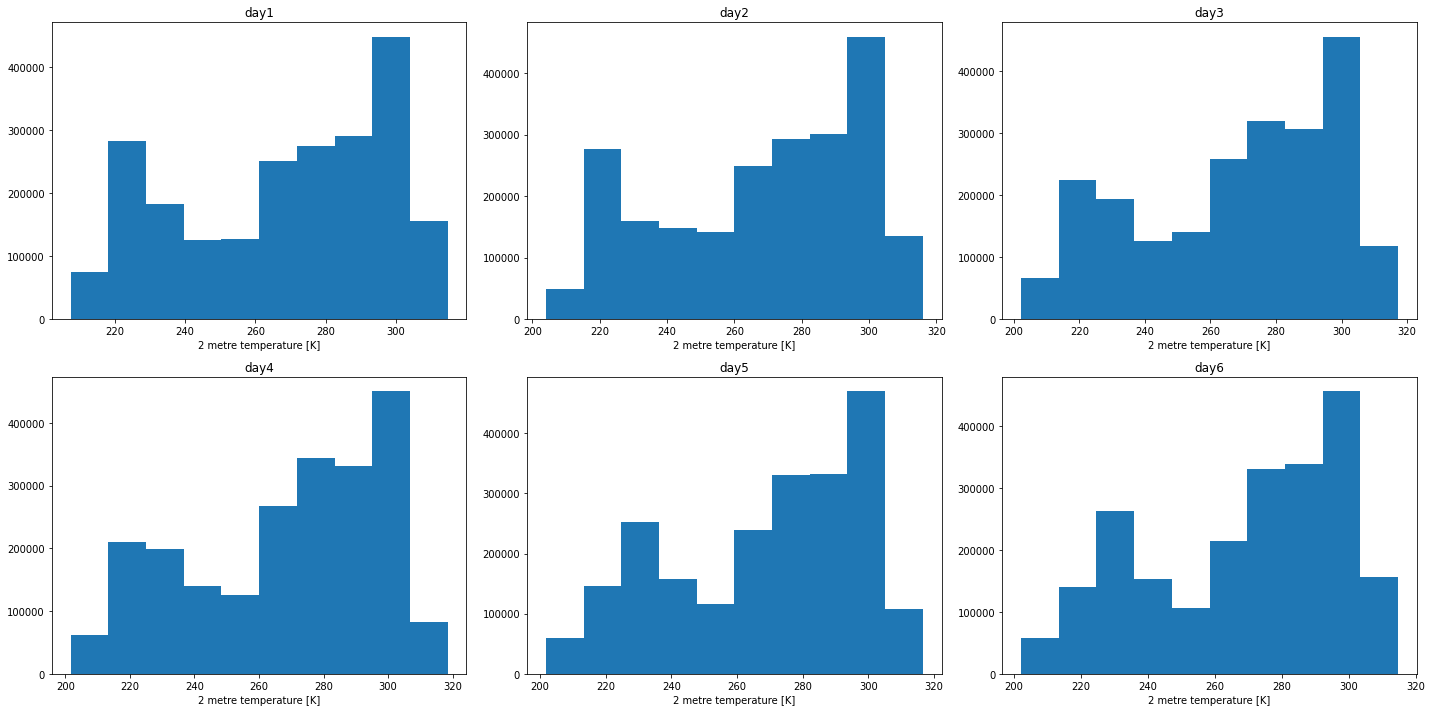

In [ ]:
fig, axes = plt.subplots(ncols=3,nrows=2, figsize=(20, 10))

xdata['t2m'].isel(time=slice(0,1)).plot.hist(ax=axes[0,0])
xdata['t2m'].isel(time=slice(1,2)).plot.hist(ax=axes[0,1])
xdata['t2m'].isel(time=slice(2,3)).plot.hist(ax=axes[0,2])
xdata['t2m'].isel(time=slice(3,4)).plot.hist(ax=axes[1,0])
xdata['t2m'].isel(time=slice(4,5)).plot.hist(ax=axes[1,1])
xdata['t2m'].isel(time=slice(5,6)).plot.hist(ax=axes[1,2])

axes[0,0].set_title("day1")
axes[0,1].set_title("day2")
axes[0,2].set_title("day3")
axes[1,0].set_title("day4")
axes[1,1].set_title("day5")
axes[1,2].set_title("day6")
fig.tight_layout()

plt.show()

Text(0.5, 1.0, 'day7')

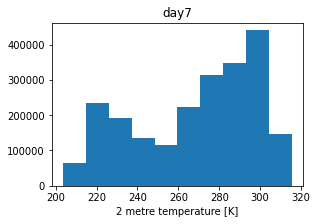

In [ ]:
xdata['t2m'].isel(time=slice(6,7)).plot.hist(size=3)

plt.title("day7")

### Plot a line to see the trend of `t2m` on daily basis @ A point in Himalaya Mountain

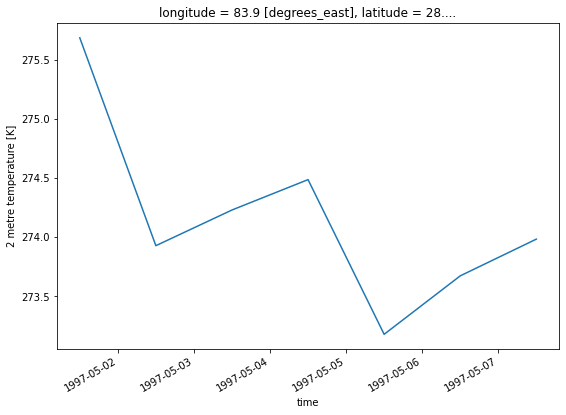

In [ ]:
xdata['t2m'].sel(time=slice('1997-05-01 12:00:00','1997-05-07 12:00:00')).sel(latitude=28.5, longitude=83.6, method='nearest').plot(size=6)

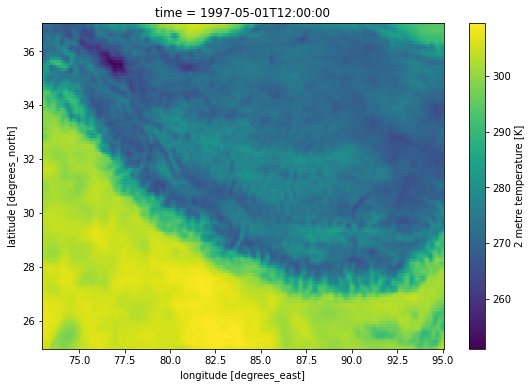

In [ ]:
xdata['t2m'].isel(time=0).sel(longitude=slice(73,95), latitude=slice(37,25)).plot(size=6)

## 2. `tp` Total precipitation (m)

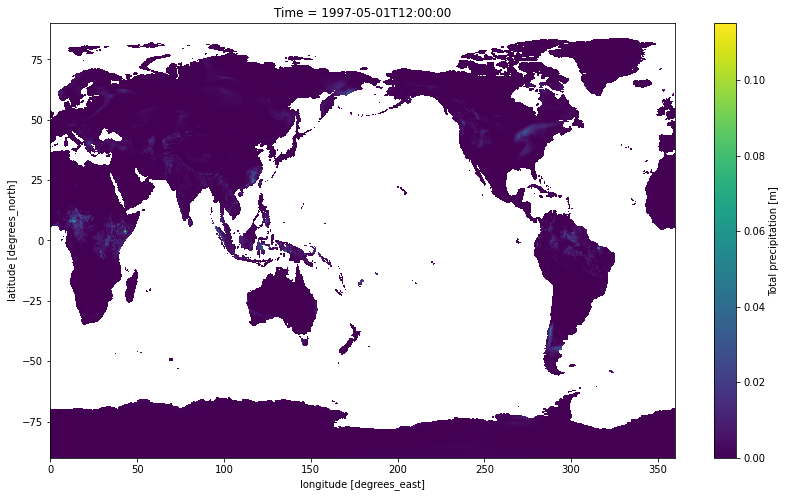

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))

cax = xdata['tp'][0,:,:].plot(
    add_colorbar=True,
    cbar_kwargs={
        'extend':'neither'
    }
)

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    # cax.set_array(tas[frame,:,:].values.flatten())
    cax.set_array(xdata['tp'][frame,:,:].values.flatten())
    ax.set_title("Time = " + str(xdata['tp'].coords['time'].values[frame])[:19])

# Finally, we use the animation module to create the animation.
ani2 = FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=6,       # Could also be iterable or list
    interval=200     # ms between frames
)

### 7-day Precipitation Change Worldwide Animation (1997-05-01 to 1997-05-07)

In [ ]:
HTML(ani2.to_jshtml())

### Histogram of 7-day for "Total Precipitation" `tp`

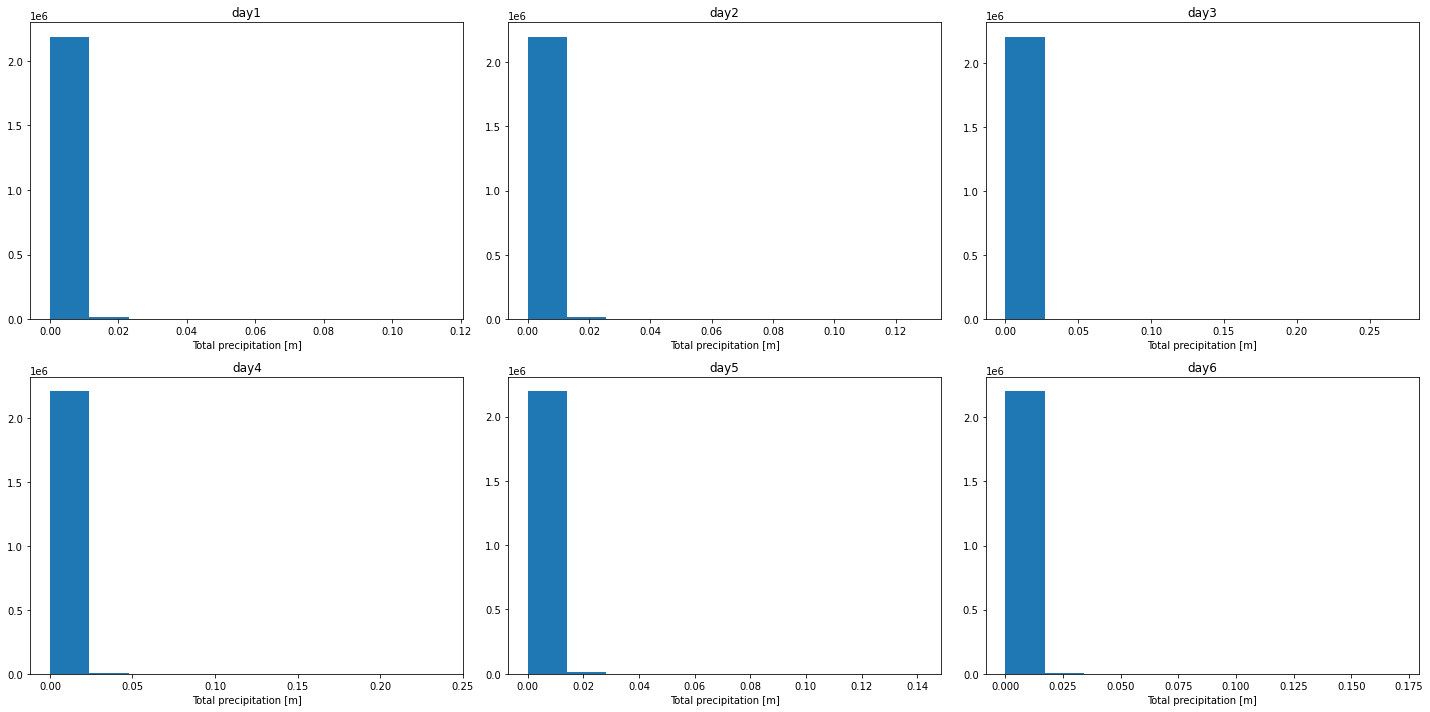

In [ ]:
fig, axes = plt.subplots(ncols=3,nrows=2, figsize=(20, 10))

xdata['tp'].isel(time=slice(0,1)).plot.hist(ax=axes[0,0])
xdata['tp'].isel(time=slice(1,2)).plot.hist(ax=axes[0,1])
xdata['tp'].isel(time=slice(2,3)).plot.hist(ax=axes[0,2])
xdata['tp'].isel(time=slice(3,4)).plot.hist(ax=axes[1,0])
xdata['tp'].isel(time=slice(4,5)).plot.hist(ax=axes[1,1])
xdata['tp'].isel(time=slice(5,6)).plot.hist(ax=axes[1,2])

axes[0,0].set_title("day1")
axes[0,1].set_title("day2")
axes[0,2].set_title("day3")
axes[1,0].set_title("day4")
axes[1,1].set_title("day5")
axes[1,2].set_title("day6")
fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Day7')

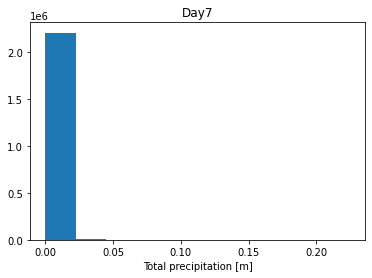

In [ ]:
xdata['tp'].isel(time=slice(6,7)).plot.hist()
plt.title("Day7")

### Plot a line to see the trend of `tp` on daily basis @ A point in Himalaya Mountain

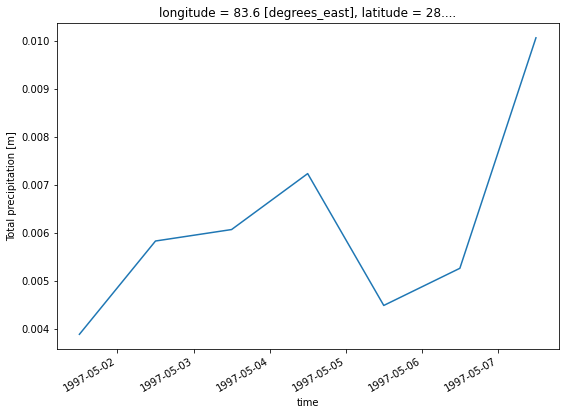

In [ ]:
xdata['tp'].sel(time=slice('1997-05-01 12:00:00','1997-05-07 12:00:00')).sel(latitude=28.5, longitude=83.6, method='nearest').plot(size=6)

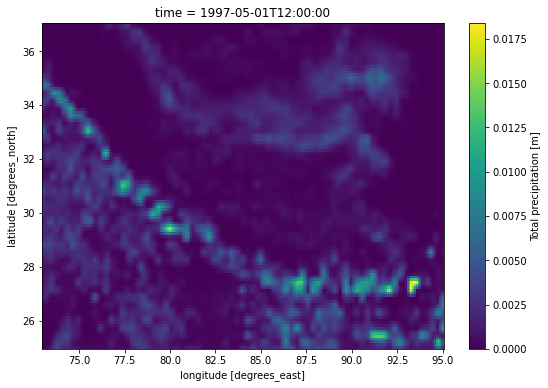

In [ ]:
xdata['tp'].isel(time=0).sel(longitude=slice(73,95), latitude=slice(37,25)).plot(size=6)